# CIFAR-10 


## Import packages

In [1]:
import numpy as np

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical 

import os
import tensorflow as tf

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline


## Load dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


## 10 First Example of dataset

Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


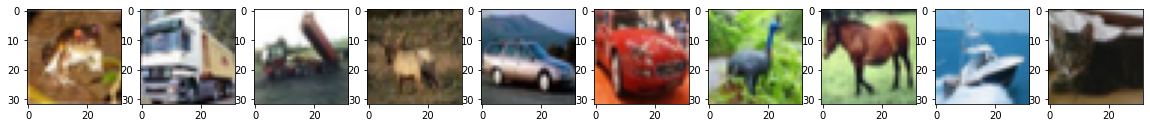

In [4]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:10]]))

f, axarr = plt.subplots(1, 10)
f.set_size_inches(20, 10)

for i in range(10):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

## Preprocess data

In [5]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

# I) Batch Size

### a) batch size = 32

In [6]:
## Build and Compile the convolutional model 
model_32 = Sequential()
model_32.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_32.add(MaxPooling2D(pool_size = (2,2)))
model_32.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_32.add(MaxPooling2D(pool_size = (2,2)))
model_32.add(Flatten())
model_32.add(Dense(128, activation ='relu'))
model_32.add(Dense(10, activation ='softmax'))

model_32.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [7]:
batch_size = 32
epochs = 20
history_32 = model_32.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 19s 6ms/step - loss: 1.5371 - accuracy: 0.4425 - val_loss: 1.3519 - val_accuracy: 0.5147
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2479 - accuracy: 0.5598 - val_loss: 1.1598 - val_accuracy: 0.5856
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1163 - accuracy: 0.6061 - val_loss: 1.1194 - val_accuracy: 0.6074
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0272 - accuracy: 0.6389 - val_loss: 1.0358 - val_accuracy: 0.6345
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9578 - accuracy: 0.6653 - val_loss: 1.0369 - val_accuracy: 0.6396
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8910 - accuracy: 0.6893 - val_loss: 0.9687 - val_accuracy: 0.6620
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8380 - accuracy: 0.7074 - val_loss: 0.9696 - val_accuracy

### b) batch size = 64

In [12]:
## Build and Compile the convolutional model 
model_64 = Sequential()
model_64.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_64.add(MaxPooling2D(pool_size = (2,2)))
model_64.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_64.add(MaxPooling2D(pool_size = (2,2)))
model_64.add(Flatten())
model_64.add(Dense(128, activation ='relu'))
model_64.add(Dense(10, activation ='softmax'))

model_64.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [13]:
batch_size = 64
epochs = 20
history_64 = model_64.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 1.5648 - accuracy: 0.4329 - val_loss: 1.3105 - val_accuracy: 0.5296
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 1.2280 - accuracy: 0.5602 - val_loss: 1.1428 - val_accuracy: 0.5923
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0986 - accuracy: 0.6135 - val_loss: 1.0989 - val_accuracy: 0.6119
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0080 - accuracy: 0.6466 - val_loss: 1.0210 - val_accuracy: 0.6431
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.9390 - accuracy: 0.6726 - val_loss: 1.0123 - val_accuracy: 0.6487
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.8818 - accuracy: 0.6920 - val_loss: 0.9727 - val_accuracy: 0.6667
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.8205 - accuracy: 0.7135 - val_loss: 0.9405 - val_accuracy: 0.6774
Epoch 

### c) batch size = 256

In [14]:
## Build and Compile the convolutional model 
model_256 = Sequential()
model_256.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_256.add(MaxPooling2D(pool_size = (2,2)))
model_256.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_256.add(MaxPooling2D(pool_size = (2,2)))
model_256.add(Flatten())
model_256.add(Dense(128, activation ='relu'))
model_256.add(Dense(10, activation ='softmax'))

model_256.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [15]:
batch_size = 256
epochs = 20
history_256 = model_256.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20
196/196 [==============================] - 3s 10ms/step - loss: 1.7332 - accuracy: 0.3706 - val_loss: 1.5180 - val_accuracy: 0.4563
Epoch 2/20
196/196 [==============================] - 2s 9ms/step - loss: 1.4106 - accuracy: 0.4962 - val_loss: 1.3377 - val_accuracy: 0.5265
Epoch 3/20
196/196 [==============================] - 2s 8ms/step - loss: 1.2900 - accuracy: 0.5424 - val_loss: 1.2491 - val_accuracy: 0.5550
Epoch 4/20
196/196 [==============================] - 2s 8ms/step - loss: 1.2043 - accuracy: 0.5760 - val_loss: 1.1708 - val_accuracy: 0.5877
Epoch 5/20
196/196 [==============================] - 2s 9ms/step - loss: 1.1356 - accuracy: 0.6019 - val_loss: 1.1384 - val_accuracy: 0.6005
Epoch 6/20
196/196 [==============================] - 2s 9ms/step - loss: 1.0805 - accuracy: 0.6250 - val_loss: 1.1100 - val_accuracy: 0.6081
Epoch 7/20
196/196 [==============================] - 2s 9ms/step - loss: 1.0428 - accuracy: 0.6378 - val_loss: 1.0994 - val_accuracy: 0.6104
Epoch

# II) Activation Functions

### a) ReLU

we can use model_32 and history_32 in part batch size=32

#### plot

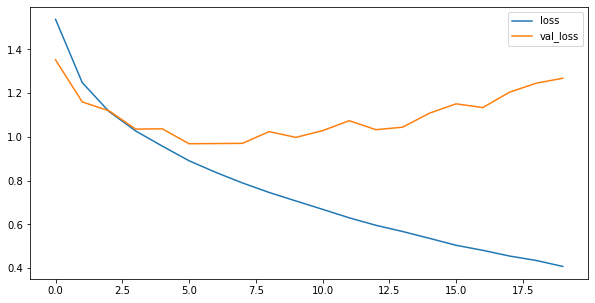

In [8]:
## plot loss
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(history_32.history['loss'], label='loss')
plt.plot(history_32.history['val_loss'], label='val_loss')
plt.legend()

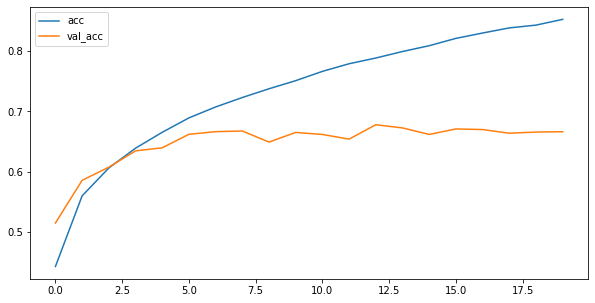

In [9]:
# Plot accuracy per iteration
plt.plot(history_32.history['accuracy'], label='acc')
plt.plot(history_32.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
test_loss, test_accuracy = model_32.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 1.2681 - accuracy: 0.6663
Test loss: 1.268127679824829
Test accuracy: 0.6662999987602234


313/313 [==============================] - 1s 2ms/step


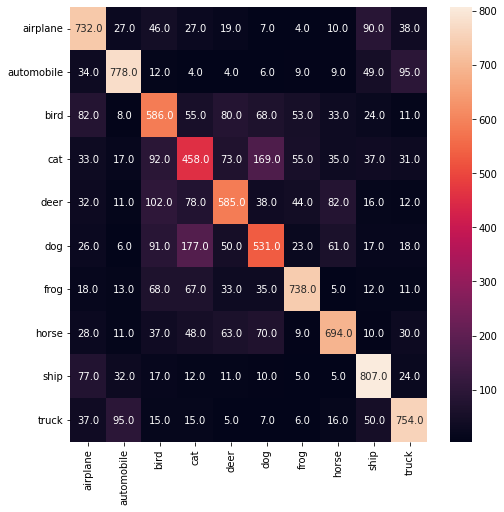

In [11]:
predictions  = model_32.predict(X_test)
predictions_for_cm = predictions.argmax(1)
y_test_for_cm = y_test.argmax(1)

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

cm = confusion_matrix(y_test_for_cm ,predictions_for_cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True,  xticklabels=class_names, yticklabels = class_names, fmt=".1f")

### b) tanh

In [19]:
model_2 = Sequential()
model_2.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='tanh'))
model_2.add(MaxPooling2D(pool_size = (2,2)))
model_2.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='tanh'))
model_2.add(MaxPooling2D(pool_size = (2,2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation ='tanh'))
model_2.add(Dense(10, activation ='softmax'))

model_2.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

batch_size = 32
epochs = 10
history_2 = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4698 - accuracy: 0.4780 - val_loss: 1.2722 - val_accuracy: 0.5576
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1799 - accuracy: 0.5880 - val_loss: 1.1844 - val_accuracy: 0.5874
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0476 - accuracy: 0.6337 - val_loss: 1.1020 - val_accuracy: 0.6193
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9511 - accuracy: 0.6681 - val_loss: 1.0781 - val_accuracy: 0.6301
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8729 - accuracy: 0.6976 - val_loss: 1.0419 - val_accuracy: 0.6408
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8045 - accuracy: 0.7193 - val_loss: 1.0644 - val_accuracy: 0.6390
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7489 - accuracy: 0.7424 - val_loss: 1.0500 - val_accuracy:

#### plot

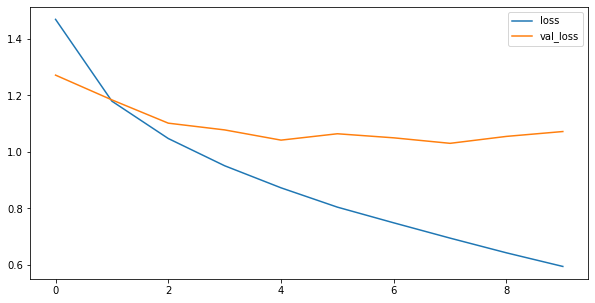

In [20]:
## plot loss
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(history_2.history['loss'], label='loss')
plt.plot(history_2.history['val_loss'], label='val_loss')
plt.legend()

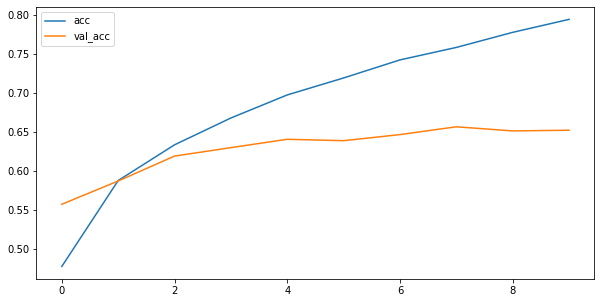

In [21]:
# Plot accuracy per iteration
plt.plot(history_2.history['accuracy'], label='acc')
plt.plot(history_2.history['val_accuracy'], label='val_acc')
plt.legend()

In [22]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 1.0723 - accuracy: 0.6524
Test loss: 1.072347640991211
Test accuracy: 0.652400016784668


313/313 [==============================] - 1s 2ms/step


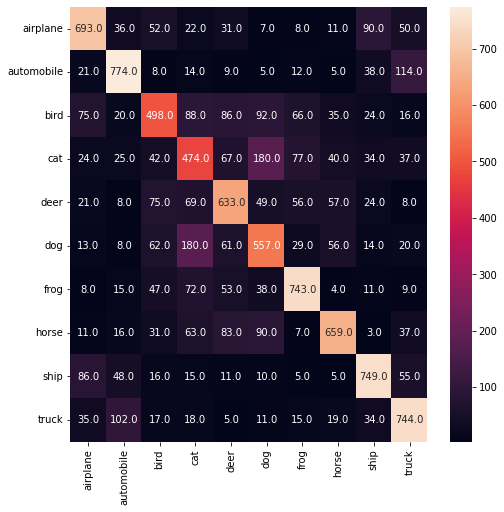

In [23]:
predictions  = model_2.predict(X_test)
predictions_for_cm = predictions.argmax(1)
y_test_for_cm = y_test.argmax(1)

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

cm = confusion_matrix(y_test_for_cm ,predictions_for_cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True,  xticklabels=class_names, yticklabels = class_names, fmt=".1f")

### c) Sigmoid

In [24]:
model_3 = Sequential()
model_3.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='sigmoid'))
model_3.add(MaxPooling2D(pool_size = (2,2)))
model_3.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='sigmoid'))
model_3.add(MaxPooling2D(pool_size = (2,2)))
model_3.add(Flatten())
model_3.add(Dense(128, activation ='sigmoid'))
model_3.add(Dense(10, activation ='softmax'))

model_3.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

batch_size = 32
epochs = 20
history_3 = model_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0097 - accuracy: 0.2586 - val_loss: 1.7896 - val_accuracy: 0.3507
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6677 - accuracy: 0.4017 - val_loss: 1.5862 - val_accuracy: 0.4255
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4893 - accuracy: 0.4630 - val_loss: 1.4503 - val_accuracy: 0.4703
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4012 - accuracy: 0.4940 - val_loss: 1.3647 - val_accuracy: 0.5052
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3366 - accuracy: 0.5219 - val_loss: 1.3268 - val_accuracy: 0.5191
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2839 - accuracy: 0.5415 - val_loss: 1.2901 - val_accuracy: 0.5327
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2393 - accuracy: 0.5574 - val_loss: 1.2596 - val_accuracy:

#### plot

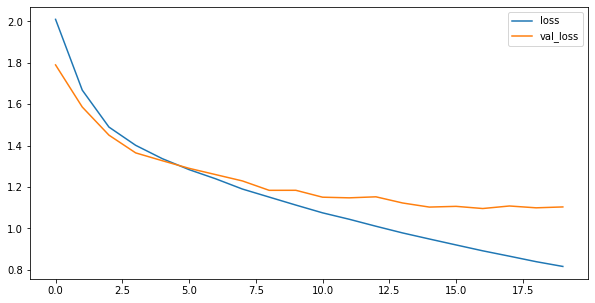

In [25]:
## plot loss
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(history_3.history['loss'], label='loss')
plt.plot(history_3.history['val_loss'], label='val_loss')
plt.legend()

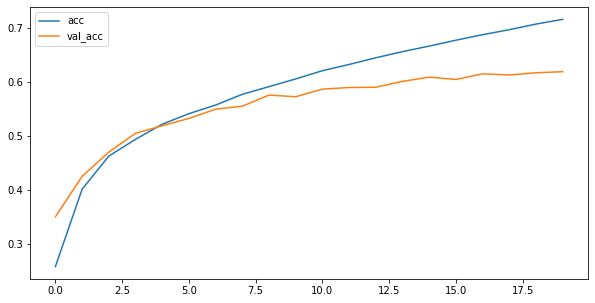

In [26]:
# Plot accuracy per iteration
plt.plot(history_3.history['accuracy'], label='acc')
plt.plot(history_3.history['val_accuracy'], label='val_acc')
plt.legend()

In [27]:
test_loss, test_accuracy = model_3.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 1.1036 - accuracy: 0.6192
Test loss: 1.103586196899414
Test accuracy: 0.6191999912261963


313/313 [==============================] - 1s 2ms/step


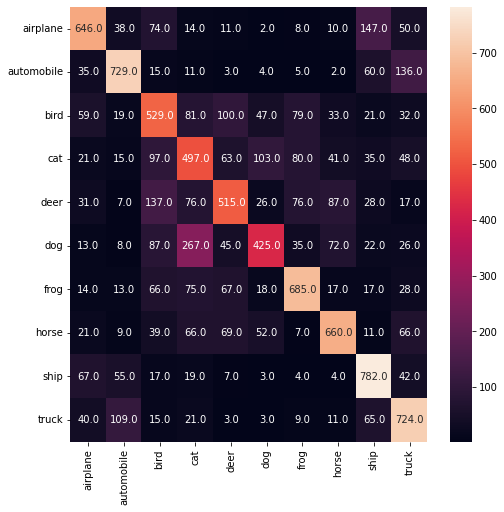

In [28]:
predictions  = model_3.predict(X_test)
predictions_for_cm = predictions.argmax(1)
y_test_for_cm = y_test.argmax(1)

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

cm = confusion_matrix(y_test_for_cm ,predictions_for_cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True,  xticklabels=class_names, yticklabels = class_names, fmt=".1f")

# III) Loss Function

a) Cross Entropy

go to activation function relu part

b) MSE

In [33]:
model_5 = Sequential()
model_5.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_5.add(MaxPooling2D(pool_size = (2,2)))
model_5.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_5.add(MaxPooling2D(pool_size = (2,2)))
model_5.add(Flatten())
model_5.add(Dense(128, activation ='relu'))
model_5.add(Dense(10, activation ='softmax'))

model_5.compile(loss ='MeanSquaredError', optimizer ='adam', metrics =['accuracy'])

batch_size = 32
epochs = 10
history_5 = model_5.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0683 - accuracy: 0.4471 - val_loss: 0.0615 - val_accuracy: 0.5220
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0561 - accuracy: 0.5711 - val_loss: 0.0564 - val_accuracy: 0.5700
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0500 - accuracy: 0.6257 - val_loss: 0.0499 - val_accuracy: 0.6237
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0458 - accuracy: 0.6631 - val_loss: 0.0498 - val_accuracy: 0.6296
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0429 - accuracy: 0.6861 - val_loss: 0.0469 - val_accuracy: 0.6551
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0403 - accuracy: 0.7092 - val_loss: 0.0465 - val_accuracy: 0.6604
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0379 - accuracy: 0.7284 - val_loss: 0.0461 - val_accuracy:

#### plot

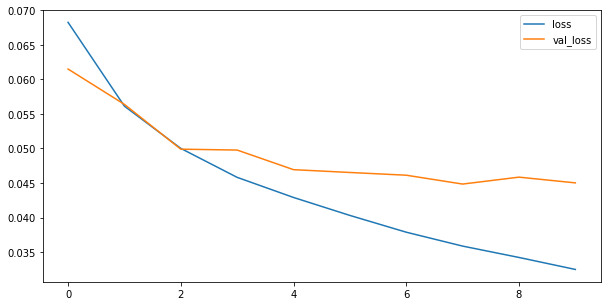

In [34]:
## plot loss
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(history_5.history['loss'], label='loss')
plt.plot(history_5.history['val_loss'], label='val_loss')
plt.legend()

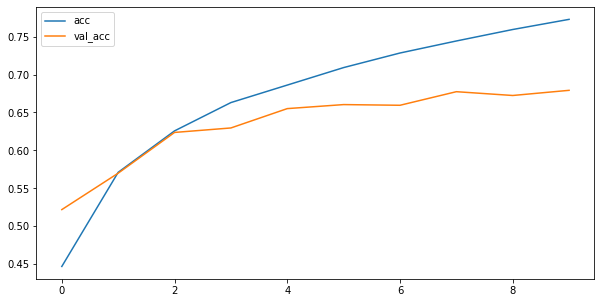

In [35]:
# Plot accuracy per iteration
plt.plot(history_5.history['accuracy'], label='acc')
plt.plot(history_5.history['val_accuracy'], label='val_acc')
plt.legend()

In [36]:
test_loss, test_accuracy = model_5.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.6792
Test loss: 0.04501636326313019
Test accuracy: 0.6791999936103821


313/313 [==============================] - 1s 3ms/step


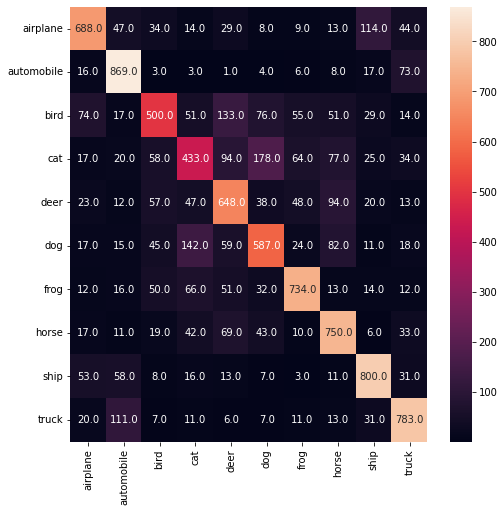

In [37]:
predictions  = model_5.predict(X_test)
predictions_for_cm = predictions.argmax(1)
y_test_for_cm = y_test.argmax(1)

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

cm = confusion_matrix(y_test_for_cm ,predictions_for_cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True,  xticklabels=class_names, yticklabels = class_names, fmt=".1f")